In [4]:
import pandas as pd

In [51]:
feed_a_pubkey = "xygzemcr5jcw" # modify this to match a public key on belfast.pvos.org

base_url = "http://belfast.pvos.org/data/"
df = pd.read_csv(base_url+feed_a_pubkey+"/csv/")

In [52]:
df['Date']= pd.to_datetime(df['timestamp'])

In [63]:
df

,id,feed_id,temperature_c,humidity_rh,distance_meters,pressure_mbar,battery_volts,gps_lat,gps_lon,gps_alt,...,voltage_3,aux_1,aux_2,aux_3,log,timestamp,rssi,node_id,node_name,Date
0,9,3,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-02-24T17:27:08.291Z,NaN,NaN,NaN,2021-02-24 17:27:08.291000+00:00
1,10,3,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-02-24T17:27:19.845Z,NaN,NaN,NaN,2021-02-24 17:27:19.845000+00:00
2,11,3,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-02-24T17:27:24.974Z,NaN,NaN,NaN,2021-02-24 17:27:24.974000+00:00
3,12,3,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-02-24T17:27:30.106Z,NaN,NaN,NaN,2021-02-24 17:27:30.106000+00:00
4,13,3,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-02-24T17:27:35.246Z,NaN,NaN,NaN,2021-02-24 17:27:35.246000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129398,249188,3,NaN,NaN,4306.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,94.0,-77.0,NaN,2021-05-19T00:32:39.629Z,NaN,NaN,NaN,2021-05-19 00:32:39.629000+00:00
129399,249189,3,NaN,NaN,4307.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,95.0,-77.0,NaN,2021-05-19T00:32:39.808Z,NaN,NaN,NaN,2021-05-19 00:32:39.808000+00:00
129400,249190,3,NaN,NaN,4307.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,96.0,-76.0,NaN,2021-05-19T00:32:39.986Z,NaN,NaN,NaN,2021-05-19 00:32:39.986000+00:00
129401,249191,3,NaN,NaN,4307.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,97.0,-76.0,NaN,2021-05-19T00:32:40.164Z,NaN,NaN,NaN,2021-05-19 00:32:40.164000+00:00


In [81]:
recent=df[~(df['Date'] < "2021-05-18 18:00")]


In [108]:
#generate subset by grabbing every 'n_skip'-th row:

n_skip = 360*5 # every 5 minutes, if data was sent 6x / sec
subset = recent.iloc[::n_skip, :]

x1=subset['Date']
y1=subset['distance_meters']

#distance_max = 10000
#y1=distance_max-subset['distance_meters']


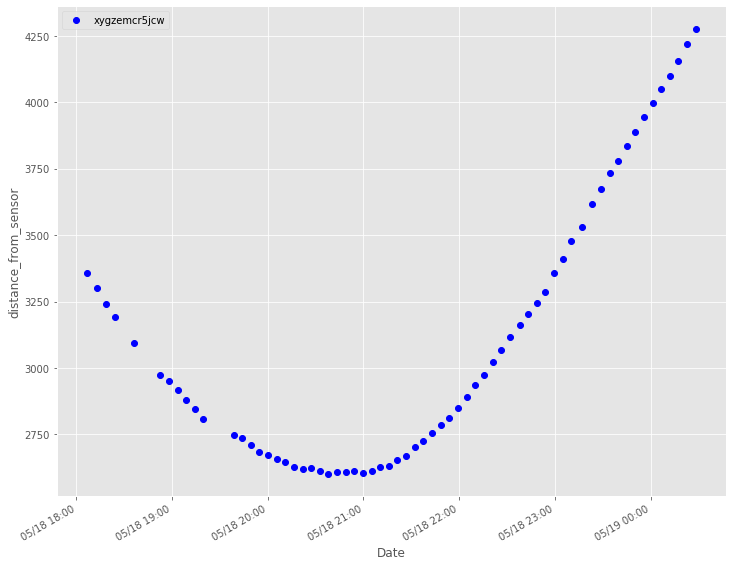

In [109]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(12, 10))
plt.plot(x1,y1,'bo',label=feed_a_pubkey)
plt.grid(True)
plt.legend()
#xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
xfmt = mdates.DateFormatter('%m/%d %H:%M')
ax=plt.gca()
ax.xaxis.set_major_formatter(xfmt)
plt.xlabel("Date")
plt.ylabel("distance_from_sensor")
plt.gcf().autofmt_xdate()
plt.show()